# National Data

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [79]:
#Importing the CSVs
nyc_file = "../New York/violent_crime_df_ny.csv"
la_file = "../Los Angeles/LA_Violent_Crime.csv"
tampa_file = "../Tampa/Tampa_violent_crime.csv"
chicago_file = "../Chicago/Chicago_Violent_Crime.csv"
dc_file = "../DC_Crime/DC_Violent_Crime.csv"
US_file = "National Data/FBI_US_Crime_Averages.csv"

nyc_data = pd.read_csv(nyc_file)
la_data = pd.read_csv(la_file)
tampa_data = pd.read_csv(tampa_file)
chicago_data = pd.read_csv(chicago_file)
dc_data = pd.read_csv(dc_file)

US_data = pd.read_csv(US_file)
US_data.columns.values

array(['Year', 'Population1', 'Violent\ncrime2',
       'Violent \ncrime \nrate ',
       'Murder and\nnonnegligent \nmanslaughter',
       'Murder and \nnonnegligent \nmanslaughter \nrate ',
       'Rape\n(revised \ndefinition)3',
       'Rape\n(revised \ndefinition) \nrate3',
       'Rape\n(legacy \ndefinition)4',
       'Rape\n(legacy \ndefinition) \nrate4', 'Robbery',
       'Robbery \nrate ', 'Aggravated \nassault',
       'Aggravated \nassault rate ', 'Property \ncrime',
       'Property \ncrime \nrate ', 'Burglary', 'Burglary \nrate ',
       'Larceny-\ntheft', 'Larceny-\ntheft rate ',
       'Motor \nvehicle \ntheft', 'Motor \nvehicle \ntheft \nrate ',
       'Unnamed: 22', 'Unnamed: 23'], dtype=object)

## Crime Rates

In [80]:
#Clean up FBI US Data
US_data = US_data.rename(columns = {'Violent \ncrime \nrate ': 'value_US', 'Year': 'year'})
US_data = US_data[['year', 'value_US']]

In [87]:
#Merge the dataframes using only the appropriate years
national_data = pd.merge(nyc_data, la_data, on='year', how='outer', suffixes=('_NYC', '_LA'))

national_data = pd.merge(national_data, chicago_data, on='year', how='outer')
national_data = national_data.rename(columns = {'value': 'value_Chi'})

national_data = pd.merge(national_data, tampa_data, on='year', how='outer')
national_data = national_data.rename(columns = {'value': 'value_Tamp'})

dc_data = dc_data.rename(columns={'Year': 'year'})
national_data = pd.merge(national_data, dc_data, on='year', how='outer')
national_data = national_data.rename(columns = {'Violent Crime Rate': 'value_DC'})

national_data = national_data[['year', 'value_NYC', 'value_LA', 'value_Chi', 'value_Tamp', 'value_DC']]

national_data = national_data.rename(columns = {'value_NYC': 'New York City', 'value_LA': 'Los Angeles', 'value_Chi': 'Chicago', 
                                                'value_Tamp': 'Tampa', 'value_DC': 'Washington D.C.'})

national_data = pd.merge(national_data, US_data, on='year', how='left')
national_data = national_data.rename(columns = {'value_US': 'U.S. Average'})

#national_data.plot(kind='line', x='year', figsize=(15,10))
national_data.to_csv('Comparative_Crime_Data.csv')

Text(0.5, 1.0, 'Violent Crime Rate Comparison')

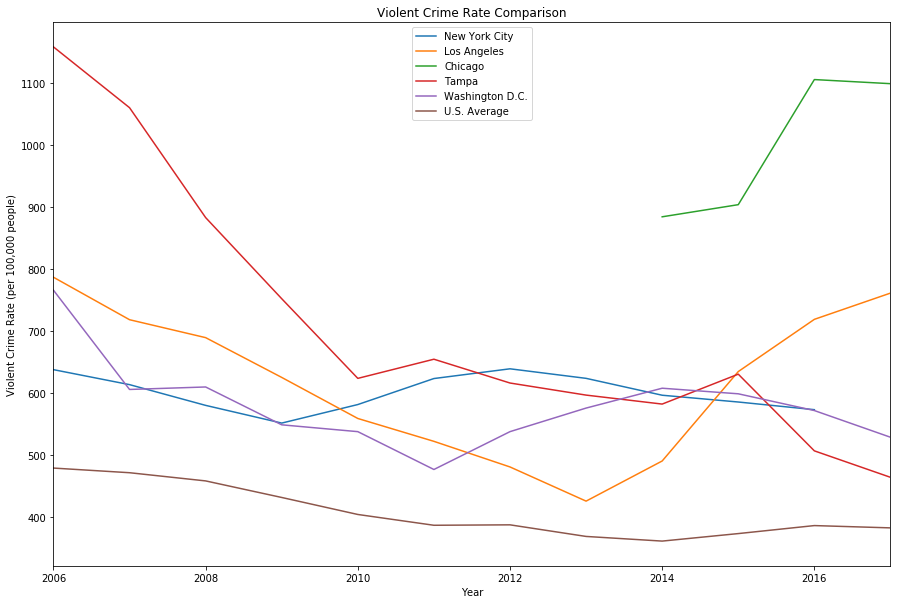

In [88]:
national_data.plot(kind='line', x = 'year', figsize = (15,10))
plt.xlabel('Year')
plt.ylabel('Violent Crime Rate (per 100,000 people)')
plt.title('Violent Crime Rate Comparison')

## Graduation Rates

In [89]:
nyc_grad_file = "../New York/HighSchoolGradRateNewYork.csv"
la_grad_file = "../Los Angeles/LA_education.csv"
chi_grad_file = "../Chicago/Chicago_Graduation_Rates.csv"
tamp_grad_file = "../Tampa/Tampa_education.csv"
dc_grad_file = "../DC_Crime/DC_Grad_Rate.csv"
us_grad_file = "National Data/National_Graduation_Rates.csv"

nyc_grad = pd.read_csv(nyc_grad_file)
la_grad = pd.read_csv(la_grad_file)
chi_grad = pd.read_csv(chi_grad_file)
tamp_grad = pd.read_csv(tamp_grad_file)
dc_grad = pd.read_csv(dc_grad_file)
us_grad = pd.read_csv(us_grad_file)

tamp_grad = tamp_grad[['Year', 'Graduation Rate']]

nyc_grad = nyc_grad.rename(columns = {'Graduation Rate %': 'New York City'})
la_grad = la_grad.rename(columns = {'Graduation Rate': 'Los Angeles'})
chi_grad = chi_grad.rename(columns = {'Graduation Rate': 'Chicago', '\ufeffYears': 'Year'})
tamp_grad = tamp_grad.rename(columns = {'Graduation Rate': 'Tampa'})
dc_grad = dc_grad.rename(columns = {'Graduation_Rate': 'Washington D.C.'})
us_grad = us_grad.rename(columns = {'Graduation Rate': 'U.S. Average'})

In [90]:
national_grad = pd.merge(nyc_grad, la_grad, on='Year', how='outer')
national_grad = pd.merge(national_grad, chi_grad, on='Year', how='outer')
national_grad = pd.merge(national_grad, tamp_grad, on='Year', how='outer')
national_grad = pd.merge(national_grad, dc_grad, on='Year', how='outer')
national_grad = pd.merge(national_grad, us_grad, on='Year', how='right')
national_grad

,Year,New York City,Los Angeles,Chicago,Tampa,Washington D.C.,U.S. Average
0,2011,79.3,73.9,80.2,84.6,87.1,79
1,2012,79.4,74.2,80.5,85.5,87.5,80
2,2013,79.8,74.5,81.1,85.9,88.4,81
3,2014,80.1,74.9,81.6,86.2,88.9,82
4,2015,80.3,75.5,82.3,86.6,89.3,83
5,2016,80.8,75.9,83.1,87.0,90.0,84
6,2017,81.1,76.4,83.8,87.1,90.3,85


Text(0.5, 1.0, 'Graduation Rate Comparison')

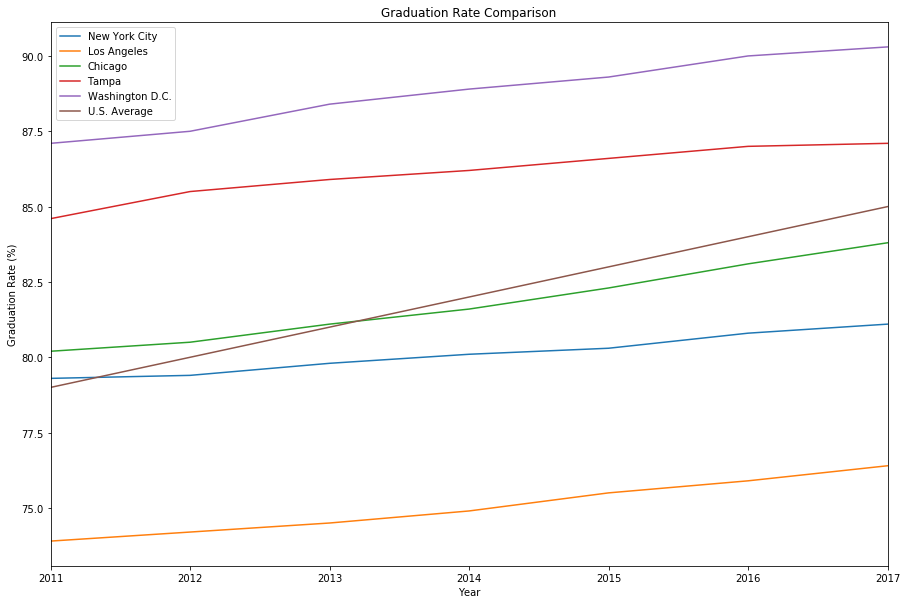

In [91]:
national_grad.plot(kind='line', x='Year', figsize=(15,10))
plt.xlabel('Year')
plt.ylabel('Graduation Rate (%)')
plt.title('Graduation Rate Comparison')

## Income

In [131]:
nyc_pov_file = "../New York/PercentEarningNewYork.csv"
la_pov_file = "../Los Angeles/LA_income.csv"
chi_pov_file = "../Chicago/Chicago_Income_Rates.csv"
tamp_pov_file = "../Tampa/Tampa_poverty.csv"
dc_pov_file = "../DC_Crime/DC_Perc_Poverty.csv"
us_pov_file = "National Data/National_Poverty_Rates.csv"

nyc_poverty = pd.read_csv(nyc_pov_file)
la_poverty = pd.read_csv(la_pov_file)
chi_poverty = pd.read_csv(chi_pov_file)
tamp_poverty = pd.read_csv(tamp_pov_file)
dc_poverty = pd.read_csv(dc_pov_file)
us_poverty = pd.read_csv(us_pov_file)

us_poverty.columns.values

array(['Year', 'Poverty Rate', 'Median Income'], dtype=object)

In [132]:
#Data Cleanup
#New York
nyc_poverty['New York City'] = nyc_poverty['<$10,000 %'] + nyc_poverty['$10,000 - $14,999 %'] + nyc_poverty['$15,000 - $24,999 %']
nyc_poverty = nyc_poverty[['Year', 'New York City']]

#Los Angeles
la_poverty['Los Angeles'] = la_poverty['% 15000-24999'] + la_poverty['% 10000-14999'] + la_poverty['% <10000']
la_poverty = la_poverty[['Year', 'Los Angeles']]

#Chicago
chi_poverty['Chicago'] = chi_poverty['< $10,000'] + chi_poverty['$10,000 - $14,999'] + chi_poverty['$15,000 - $24,999']
chi_poverty = chi_poverty.rename(columns={'\ufeffYears': 'Year'})
chi_poverty = chi_poverty[['Year', 'Chicago']]

#Tampa
tamp_poverty = tamp_poverty.rename(columns = {'% <25000': 'Tampa'})
tamp_poverty = tamp_poverty[['Year', 'Tampa']]

#Washington D.C.
dc_poverty = dc_poverty.rename(columns = {'Percent Below Poverty Line': 'Washington D.C.'})
dc_poverty = dc_poverty[['Year', 'Washington D.C.']]

#United States
us_poverty = us_poverty.rename(columns = {'Poverty Rate': 'U.S. Average'})
us_poverty = us_poverty[['Year', 'U.S. Average']]

In [138]:
national_poverty = pd.merge(nyc_poverty, la_poverty, on='Year', how='outer')
national_poverty = pd.merge(national_poverty, chi_poverty, on='Year', how='outer')
national_poverty = pd.merge(national_poverty, tamp_poverty, on='Year', how='outer')
national_poverty = pd.merge(national_poverty, dc_poverty, on='Year', how='outer')
national_poverty = pd.merge(national_poverty, us_poverty, on='Year', how='left')
national_poverty

,Year,New York City,Los Angeles,Chicago,Tampa,Washington D.C.,U.S. Average
0,2010,21.3,31.3,23.1,24.6,12.3,15.1
1,2011,20.5,30.1,21.5,22.7,11.1,15.0
2,2012,20.1,29.5,20.9,22.8,10.6,15.0
3,2013,20.0,29.8,20.5,21.8,10.0,14.8
4,2014,19.7,29.5,20.2,21.1,9.4,14.8
5,2015,19.6,29.5,20.1,20.9,9.4,13.5
6,2016,18.9,28.4,19.2,21.1,9.4,12.7
7,2017,17.9,26.7,17.8,20.7,8.6,12.3


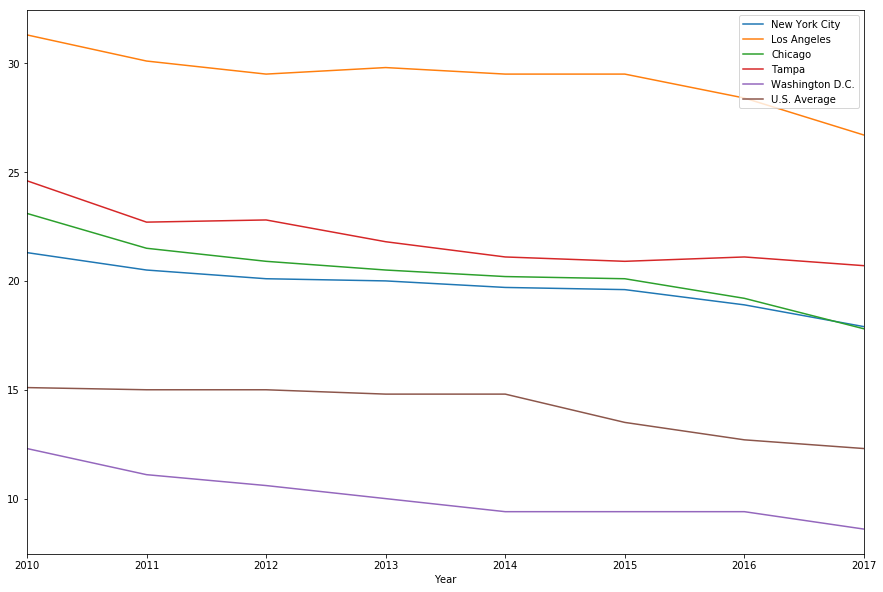

In [139]:
national_poverty.plot(kind='line', x='Year', figsize=(15,10))